### Brazzilian E commerace data  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer



pd.set_option("display.max_columns",None)

In [5]:
customers_data= pd.read_csv("olist_customers_dataset.csv")
geolocation_data = pd.read_csv("olist_geolocation_dataset.csv")
order_items_data = pd.read_csv("olist_order_items_dataset.csv")
order_payment_data = pd.read_csv("olist_order_payments_dataset.csv")
order_review_data= pd.read_csv("olist_order_reviews_dataset.csv")
order_data =pd.read_csv("olist_orders_dataset.csv")
product_data = pd.read_csv("olist_products_dataset.csv")
seller_data = pd.read_csv("olist_sellers_dataset.csv")
product_category_data = pd.read_csv("product_category_name_translation.csv")

In [6]:

data1=pd.merge(order_data,order_items_data,left_on='order_id',right_on='order_id')
data2=pd.merge(data1,seller_data,left_on='seller_id',right_on='seller_id')
data3=pd.merge(data2,product_data,left_on='product_id',right_on='product_id')
data4=pd.merge(data3,order_review_data,left_on='order_id',right_on='order_id')
data5=pd.merge(data4,product_category_data,left_on='product_category_name',right_on='product_category_name')
df=pd.merge(data5,customers_data,left_on='customer_id',right_on='customer_id')
data=pd.merge(df,order_payment_data,left_on='order_id',right_on='order_id')

In [7]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,credit_card,1,37.77


In [8]:
missing=data.isnull().sum()

In [9]:
df=data.copy()

In [10]:
df.shape

(115609, 40)

In [11]:
df[['order_approved_at',
      'order_purchase_timestamp',
      'order_delivered_customer_date',
      'order_estimated_delivery_date']]=df[['order_approved_at',
                                              'order_purchase_timestamp',
                                              'order_delivered_customer_date',
                                              'order_estimated_delivery_date']].apply(pd.to_datetime)

In [12]:
df=df.drop_duplicates(subset={'order_id','customer_id'},keep='first',inplace=False)
df=df.reindex()


In [13]:
df.shape

(96516, 40)

In [14]:
df=df.drop(['review_comment_title','review_comment_message'],axis=1)

In [15]:
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'],inplace=True)
df['order_approved_at'].fillna(df['order_purchase_timestamp'],inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(95556, 38)

In [18]:
categorical_col = [col for col in df.columns if data[col].dtype=='O' ]
categorical_col

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'seller_city',
 'seller_state',
 'product_category_name',
 'review_id',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name_english',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'payment_type']

In [19]:
# Based on the rating make decision to drop the product or not

In [20]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name_english',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [21]:
# univariate anlysis on review_score

In [22]:
df.review_score.value_counts()

5    56125
4    18702
1     9840
3     7928
2     2961
Name: review_score, dtype: int64

In [23]:
def partition(x):
    if x<3:
        return 0
    return 1

df['review_score']=df['review_score'].map(lambda cw : partition(cw))

In [24]:
df.review_score.value_counts()

1    82755
0    12801
Name: review_score, dtype: int64

In [25]:
df1=df[df['review_score']==0]

In [26]:
df1.shape

(12801, 38)

In [27]:
PRESENT=datetime(2018,9,3)
rfm=df1.groupby('product_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'payment_value': lambda price: price.sum()})

rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(float)

In [28]:
rfm.head()

,recency,frequency,monetary
product_id,,,
0009406fd7479715e4bef61dd91f2462,255,1,242.10
001795ec6f1b187d37335e1c4704762e,249,3,212.27
001b72dfd63e9833e8c02742adf472e3,344,2,158.22
00210e41887c2a8ef9f791ebc780cc36,433,1,15.48
002159fe700ed3521f46cfcf6e941c76,144,2,496.30


In [29]:
rfm.sort_values('frequency',axis=0,ascending=False).head(20)

,recency,frequency,monetary
product_id,,,
99a4788cb24856965c36a24e339b6058,20,69,9808.53
aca2eb7d00ea1a7b8ebd4e68314663af,27,51,6366.44
53759a2ecddad2bb87a079a1f1519f73,24,46,5808.94
422879e10f46682990de24d770e7f83d,66,44,6337.69
e0d64dcfaa3b6db5c54ca298ae101d05,12,42,7454.56
7c1bd920dbdf22470b68bde975dd3ccf,28,42,3205.14
389d119b48cf3043d311335e499d9c6b,36,40,4691.01
2b4609f8948be18874494203496bc318,6,39,4061.28
53b36df67ebb7c41585e8d54d6772e08,54,36,5450.99


In [30]:
rfm1=rfm[(rfm['frequency']>=10) & (rfm['recency']<=30)]

In [31]:
rfm1=rfm1.reset_index()

### we can't drop these product from the store althogh these product review is not good but people buy these product frequencently in between a month

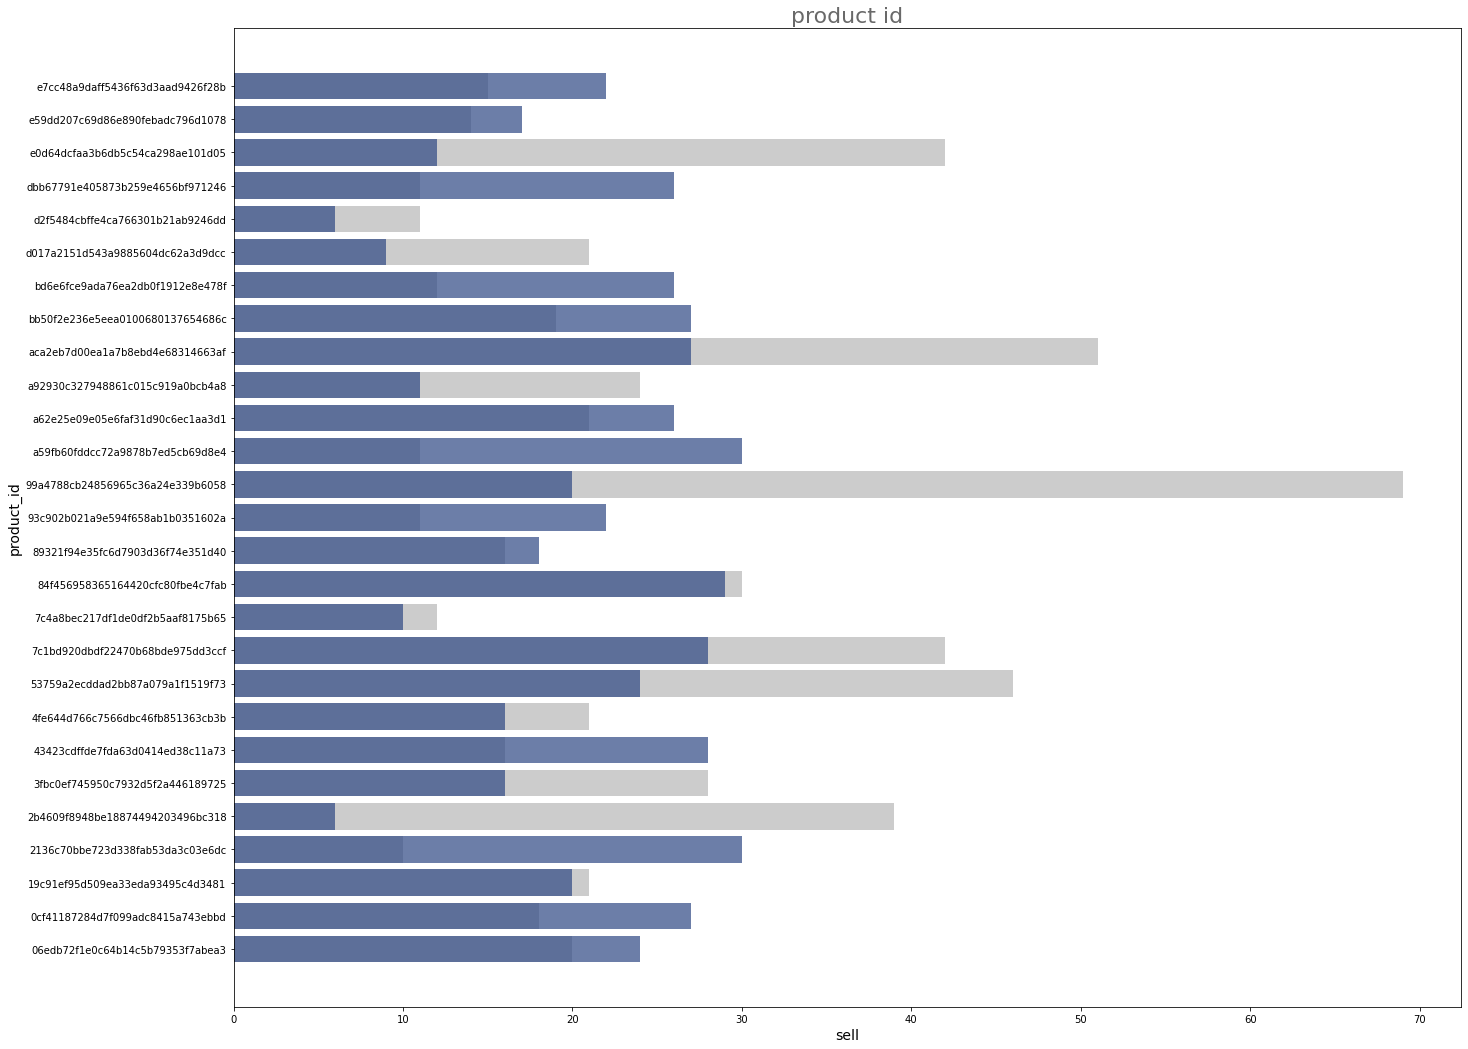

In [32]:
plt.figure(figsize=(22,18))
plt.barh(rfm1.product_id,rfm1.frequency,color='grey',alpha=0.4)
plt.barh(rfm1.product_id,rfm1.recency,color='#2e4884',alpha=0.7)
plt.title(' product id ',fontsize=22,color='dimgrey')
plt.ylabel('product_id',fontsize=14)
plt.xlabel('sell',fontsize=14)
plt.savefig('plot14.png', dpi=480, bbox_inches='tight')
plt.show()

In [33]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name_english',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [34]:
final_df=df[['order_status','payment_sequential','payment_type','payment_installments', 'payment_value',
    'customer_state','price','freight_value','product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm','product_category_name_english',
    'review_score']]

In [35]:
final_df.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score
0,delivered,1,credit_card,1,18.12,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1
3,delivered,1,credit_card,3,37.77,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1
4,delivered,1,credit_card,1,37.77,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1
5,delivered,1,boleto,1,44.09,SC,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1
6,delivered,1,credit_card,1,127.45,SP,46.80,67.70,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,0


In [36]:
final_df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year) #gives year Example :2016-10-04 09:43:32 ---->2016
final_df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month)

C:\Windows\Temp\ipykernel_7244\539322882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year) #gives year Example :2016-10-04 09:43:32 ---->2016
C:\Windows\Temp\ipykernel_7244\539322882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month)


In [37]:
final_df.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_state,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,order_purchase_year,order_purchase_month
0,delivered,1,credit_card,1,18.12,SP,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,2017,10
3,delivered,1,credit_card,3,37.77,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,2017,8
4,delivered,1,credit_card,1,37.77,SP,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,2017,8
5,delivered,1,boleto,1,44.09,SC,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,2017,10
6,delivered,1,credit_card,1,127.45,SP,46.80,67.70,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,0,2017,8


In [38]:
# spliting data

X=final_df.drop(['review_score'],axis=1)
Y=final_df['review_score'].values

In [39]:
categorical_feature = [feature for feature in X if X[feature].dtype=='O']
categorical_feature

['order_status',
 'payment_type',
 'customer_state',
 'product_category_name_english']

In [40]:
X['order_status'].value_counts()

delivered    94485
shipped       1008
canceled        63
Name: order_status, dtype: int64

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(binary= True)
vect.fit(X['order_status'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
order_st = vect.transform(X['order_status'].values)



In [43]:
vect = CountVectorizer(binary= True)
vect.fit(X['payment_type'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
payment_st = vect.transform(X['payment_type'].values)



In [44]:
vect_os_tr = CountVectorizer(binary= True)
vect_os_tr.fit(X['product_category_name_english'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
pro_st = vect.transform(X['product_category_name_english'].values)



In [45]:
vect = CountVectorizer(binary= True)
vect.fit(X['customer_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
cust_st = vect.transform(X['customer_state'].values)


In [46]:
## Numerical features

num_feature = [feature for feature in X if X[feature].dtype!='O']

from sklearn.preprocessing import Normalizer

def normalizer(col):
    normalizer = Normalizer()
    normalizer.fit(X[col].values.reshape(-1,1))
    norm = normalizer.transform(X[col].values.reshape(-1,1))
  
    return norm

In [47]:
norm =[]

for i in num_feature:
    a = normalizer(i)
    norm.append(a)
  

In [48]:
from scipy.sparse import hstack,csr_matrix
import numpy as np
x_norm = np.hstack((norm))

x=hstack((order_st,payment_st,cust_st,pro_st)).tocsr()
x.shape

(95556, 38)

In [49]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=12)

In [50]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(), 
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [54]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc


def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        
       
        print('='*35)
        print('\n')
        

In [55]:
report_knn = evaluate_models(X_train, Y_train, models)

NameError: name 'total_cost' is not defined